# **Sales Prediction Machine Learning Model**

The ML model trains a video game sales prediction model using a dataset from a hackathon and then use the trained model for giving sales prediction based on user inputs. We use catboost for building model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

In [2]:
warnings.filterwarnings(action = "ignore")
# To ignore warning

In [3]:
input = pd.read_csv("/content/drive/MyDrive/ML Projects/Sales Prediction/Data/Train.csv")

In [4]:
input.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [5]:
input.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [6]:
# y = input["SalesInMillions"]
input.drop(columns=["ID"], inplace=True)


In [7]:
train, test = train_test_split(input,random_state=42, test_size=0.2)

## **Pandas-Profiling**

 **Pandas-profiling delivers an extended analysis of a DataFrame while allowing the data analysis to be exported in different formats such as html and json.**

In [9]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# if the above didn't work try !pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 20.1 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345980 sha256=4748202fc609b81311e8ca46ed4bba7

## **Exploratory Data Analysis**

It extracts vital features and trends 

In [8]:
from ydata_profiling import ProfileReport
report = ProfileReport(train, title="Report", html={'style': {'full_width':True}})

In [9]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
report.to_file("pandas_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df = pd.DataFrame(train.groupby(['CONSOLE']).agg({'SalesInMillions': 'sum'}))

<AxesSubplot: xlabel='CONSOLE'>

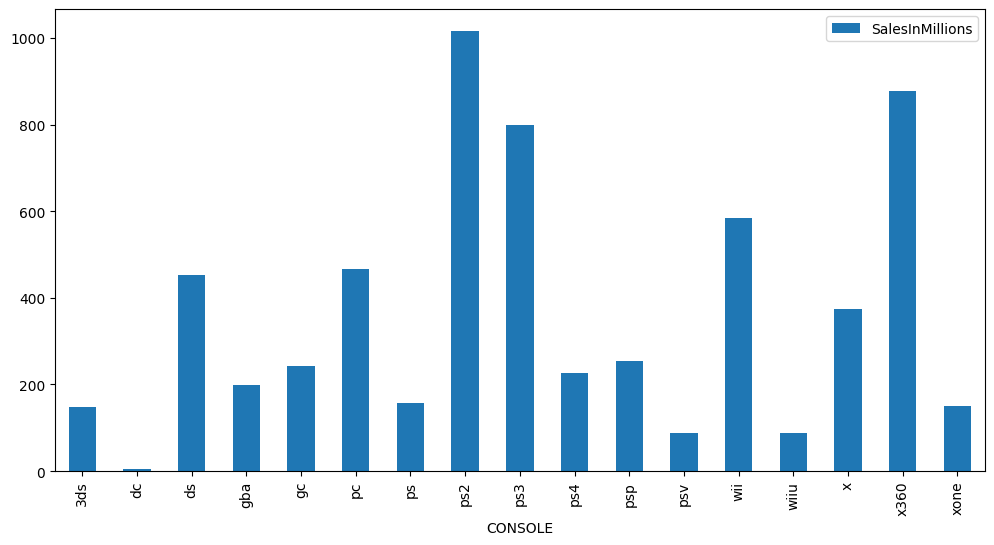

In [12]:
df.plot.bar(figsize=(12, 6))

<AxesSubplot: xlabel='YEAR'>

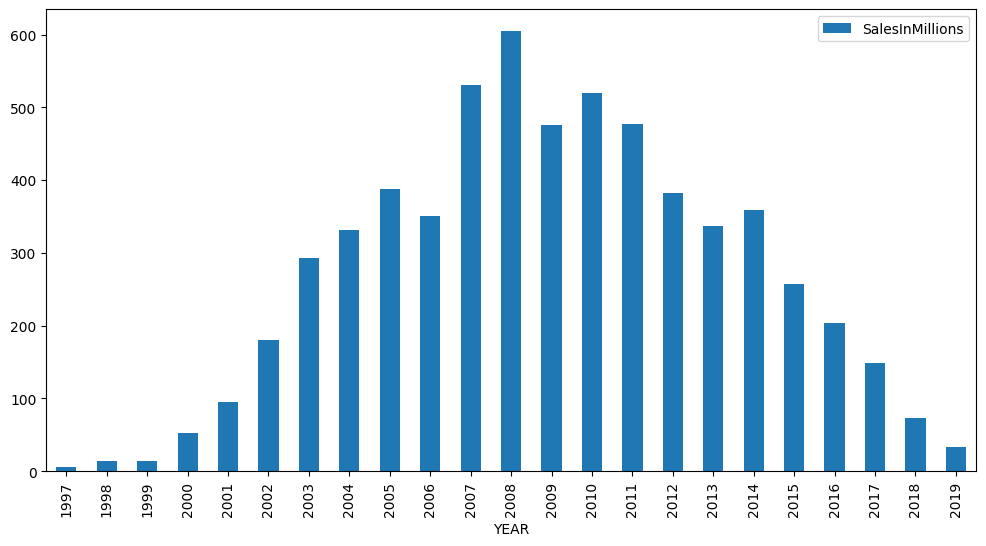

In [13]:
df = pd.DataFrame(train.groupby(['YEAR']).agg({'SalesInMillions': 'sum'}))
df.plot.bar(figsize=(12, 6))

<AxesSubplot: xlabel='CATEGORY'>

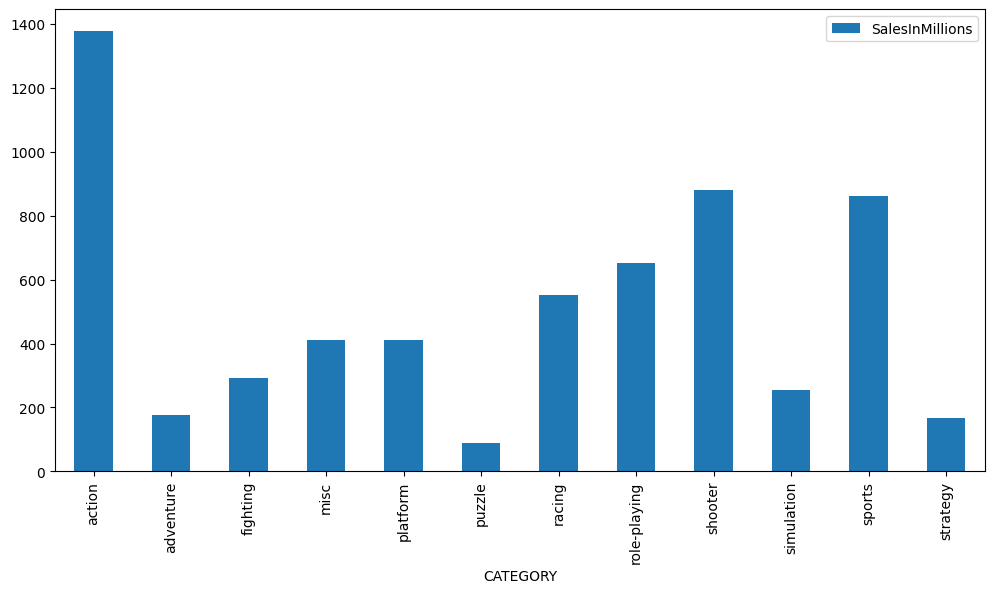

In [14]:
df = pd.DataFrame(train.groupby(['CATEGORY']).agg({'SalesInMillions': 'sum'}))
df.plot.bar(figsize=(12, 6))

## **Feature Extraction**

**Extracting that features which are relevant for the sales prediction, we have fewer features and emphasis on actually using the model**

**~No text representation or label encoding is required since we are using Catboost**

## **Train the Model**

We are going to use catboost regression model for our dataset since we have a lot of categorical features.

In [15]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.5 MB/s eta 0:00:00


In [16]:
import catboost as cat

In [17]:
cat_feat = ['CATEGORY','CONSOLE', 'PUBLISHER', 'RATING']
features = list(set(train.columns)-set(['SalesInMillions'])) # Instead this we can also s
target = 'SalesInMillions'
model = cat.CatBoostRegressor(random_state = 100, cat_features=cat_feat,verbose=0)
model.fit(train[features], train[target])

# **Accuracy of the Model**

### Now we have to check the accuracy of the built model 

In [20]:
y_test = pd.DataFrame(data = test[target], columns = ['SalesInMillions'])
x_test = pd.DataFrame(data = test[features], columns = ['CONSOLE',
 'CRITICS_POINTS',
 'USER_POINTS',
 'CATEGORY',
 'PUBLISHER',
 'YEAR',
 'RATING'])
# x_test =test[[features]].copy()
model.score(x_test,y_test)

-960.5654334019605

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = model.predict(x_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse

1.5074196071374992

# **Saving Our Model**

**As we have trained our model, now we have to save the model.**

In [26]:
import pickle
filename = '/content/drive/MyDrive/ML Projects/Sales Prediction/salesprediction_model.pkl'
pickle.dump(model, open(filename,'wb'))